# <font color='dimgray'> <center> REGRESSION - Prediction  Black Friday Sales Purchases

# About Dataset
### Dataset History

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city type, stay in the current city), product details (productid and product category) and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

# <font color='dimgray'> <center> I.Read & Understand Dataset

In [1]:
#importing dependencies

import pandas as pd #for dataframe operations
import numpy as np #for numerical operations

#for graphs
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style= "darkgrid")

#to handle the warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load dataset

df = pd.read_csv("train.csv")

In [3]:
df.head(3)   #top 3 records

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [4]:
df.tail(3)     #bottom 3 records

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
def missing_values_analysis(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss =df[na_columns].isnull().sum().sort_values (ascending=True)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values (ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis =1, keys=['Missing Values', 'Ratio']) 
    missing_df = pd.DataFrame(missing_df)
    return missing_df

In [6]:
def overview(df, head=5, tail= 5):
    print('\033[1;36mINITIAL DATASET OVERVIEW\033[0m')
    print("\033[1;3mSHAPE\033[0m".center(82,'-'))
    print('\033[1;3mRows:\033[0m {}'.format(df.shape[0]))
    print('\033[1;3mcolumns:\033[0m {}'.format(df.shape[1]))
    print("\033[1;3mTYPES\033[0m".center(82,'-'))
    print(df.dtypes)
    print("\033[1;3mMissing Values\033[0m".center(82,'-'))
    print(missing_values_analysis (df))
    print("\033[1;3mUnique Values\033[0m".center(82,'-'))
    print( df.nunique())
    

In [7]:
overview(df)

INITIAL DATASET OVERVIEW
---------------------------------SHAPE----------------------------------
Rows: 550068
columns: 12
---------------------------------TYPES----------------------------------
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object
-----------------------------Missing Values-----------------------------
                    Missing Values  Ratio
Product_Category_2          173638  31.57
Product_Category_3          383247  69.67
-----------------------------Unique Values------------------------------
User_ID                        5891
Product_ID                

__We can drop User_ID and Product_ID for model prediction as it has more unique values.__

In [8]:
data = df.drop(['User_ID','Product_ID'],axis=1)

In [9]:
#unique values

col = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1'
      ,'Product_Category_2','Product_Category_3']

for c in col:
    print('\033[1;3m',c,'\033[0m')
    print(data[c].unique())
    print("".center(82,'-' ))

 Gender 
['F' 'M']
----------------------------------------------------------------------------------
 Age 
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
----------------------------------------------------------------------------------
 Occupation 
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
----------------------------------------------------------------------------------
 City_Category 
['A' 'C' 'B']
----------------------------------------------------------------------------------
 Stay_In_Current_City_Years 
['2' '4+' '3' '1' '0']
----------------------------------------------------------------------------------
 Marital_Status 
[0 1]
----------------------------------------------------------------------------------
 Product_Category_1 
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
----------------------------------------------------------------------------------
 Product_Category_2 
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9.

# <font color='grey'><center> II. Exploratory Data Analysis

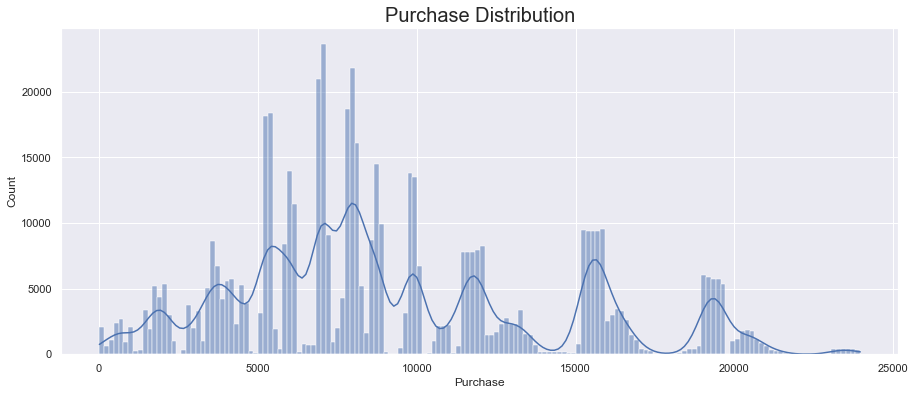

In [10]:
plt.figure(figsize=(15,6))
sns.histplot(data["Purchase"],kde=True)
plt.title("Purchase Distribution",fontsize=20)
plt.show()

## Interpretation:
We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

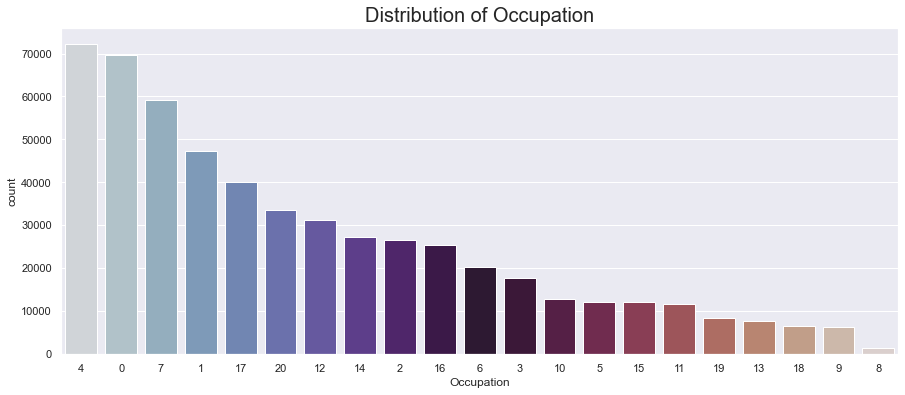

In [11]:
plt.figure(figsize=(15,6))
plt.title('Distribution of Occupation',fontsize=20)
large_to_small = data.groupby('Occupation').size().sort_values().index[::-1]
sns.countplot(x='Occupation', data=data, order=large_to_small,palette='twilight')
plt.show()

## Interpretation:
From the above graph we can conclude that Occupation-8 has minimum count & Occupation-4 has maximum count

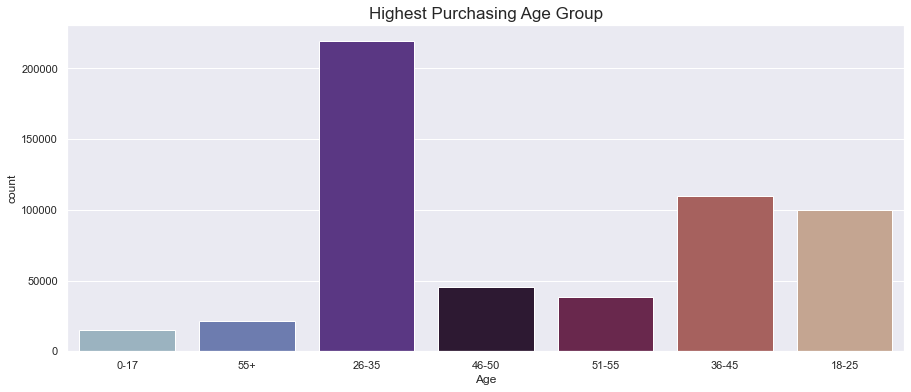

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=data,palette ='twilight');
plt.title('Highest Purchasing Age Group',fontsize=17)
plt.show()

## Interpretation:
Age group 26-35 was the highest purchasing Age group for Black Friday sale

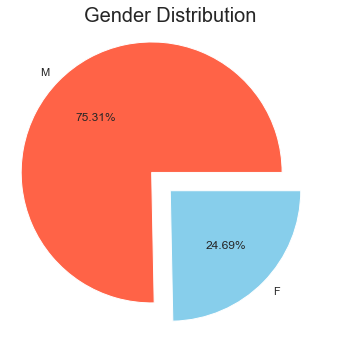

In [13]:
plt.figure(figsize=(15,6))
percentage = data["Gender"].value_counts()         
labels = list(data["Gender"].value_counts().index)
explode = (0.2, 0)
c = ['tomato','skyblue']
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode=explode,colors=c)
plt.title('Gender Distribution',fontsize=20)
plt.show()

### Interpretation:
About 75% of purchases was made by Male Customers and Female Customers accounted for approx 24% of purchases.

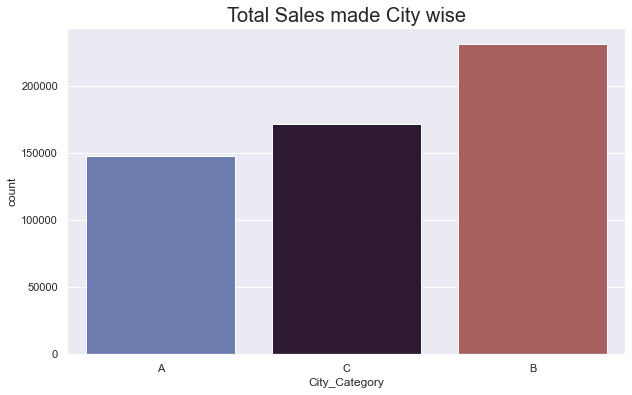

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x="City_Category",data=data ,palette ='twilight');
plt.title('Total Sales made City wise',fontsize=20)
plt.show()

## Interpretation:
City B acccounted for highest number of Sales.

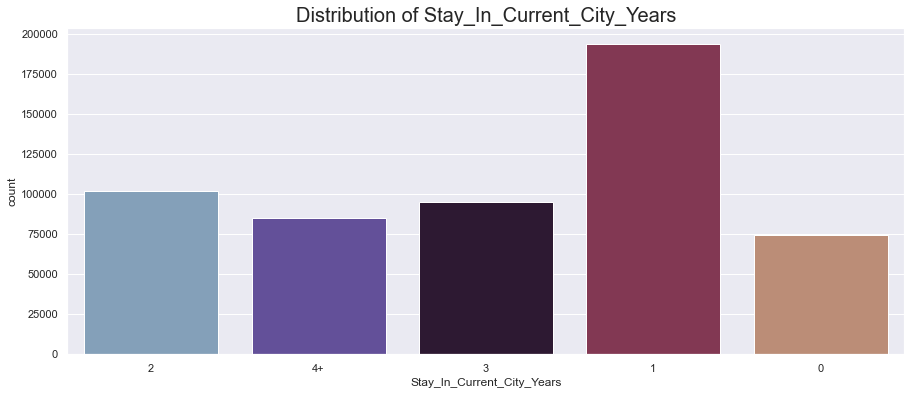

In [15]:
plt.figure(figsize=(15,6))
plt.title('Distribution of Stay_In_Current_City_Years',fontsize=20)
sns.countplot(data['Stay_In_Current_City_Years'],palette ='twilight')
plt.show()

## Interpretation:
It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

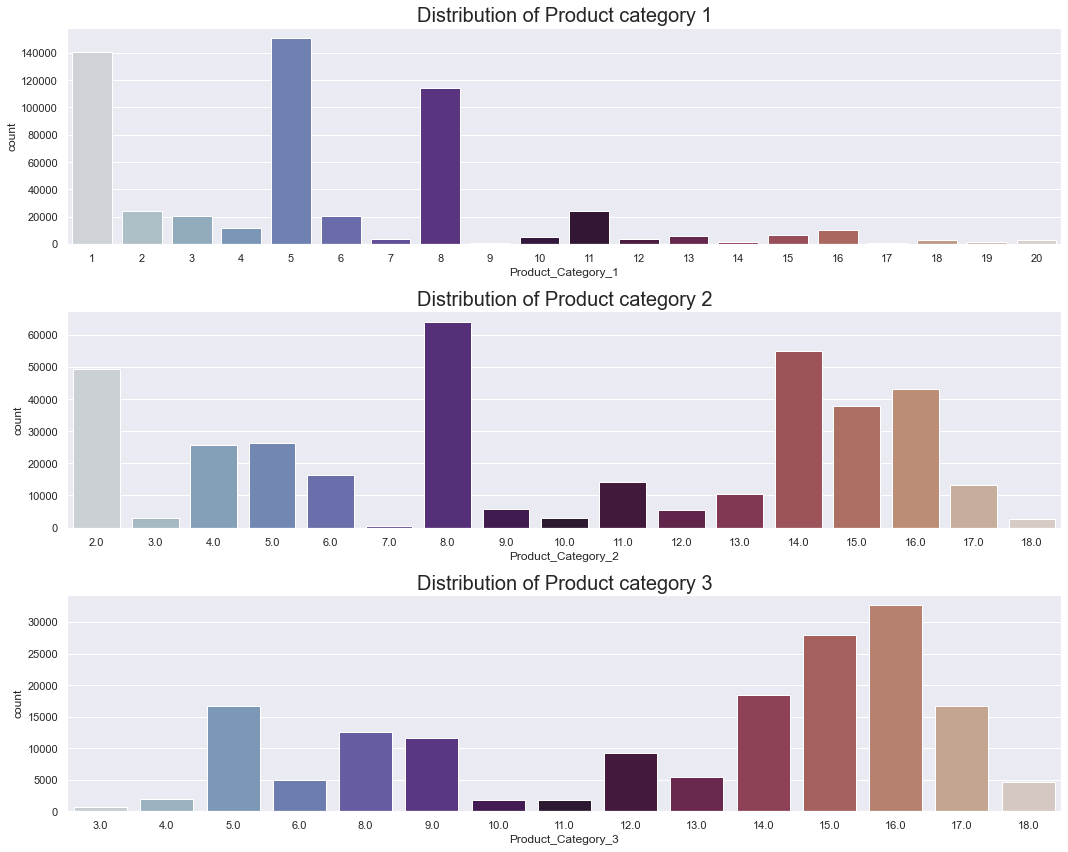

In [16]:
plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
plt.title('Distribution of Product category 1',fontsize=20)
sns.countplot(data['Product_Category_1'],palette ='twilight')

plt.subplot(3,1,2)
plt.title('Distribution of Product category 2',fontsize=20)
sns.countplot(data['Product_Category_2'],palette ='twilight')


plt.subplot(3,1,3)
plt.title('Distribution of Product category 3',fontsize=20)
sns.countplot(data['Product_Category_3'],palette ='twilight')

plt.tight_layout()
plt.show()

## Interpretation:
- It is clear that Product_Category_1 numbers 1,5 and 8 stand out.
- In Product_Category_2 numbers 2.0,8.0 and 14.0 stand out.
- In Product_Category_3 numbers 15.0 and 16.0 stand out.
- Unfortunately we don't know which product each number represents as it is masked.

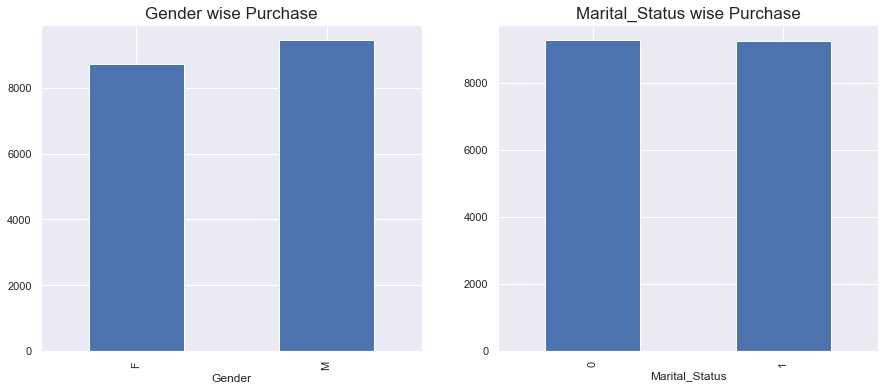

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
data.groupby("Gender").mean()["Purchase"].plot(kind='bar')
plt.title("Gender wise Purchase",fontsize=17)

plt.subplot(1,2,2)
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status wise Purchase",fontsize=17)
plt.show()

## Interpretation:

- On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.
- The average purchase amount of married and unmarried people are the same.

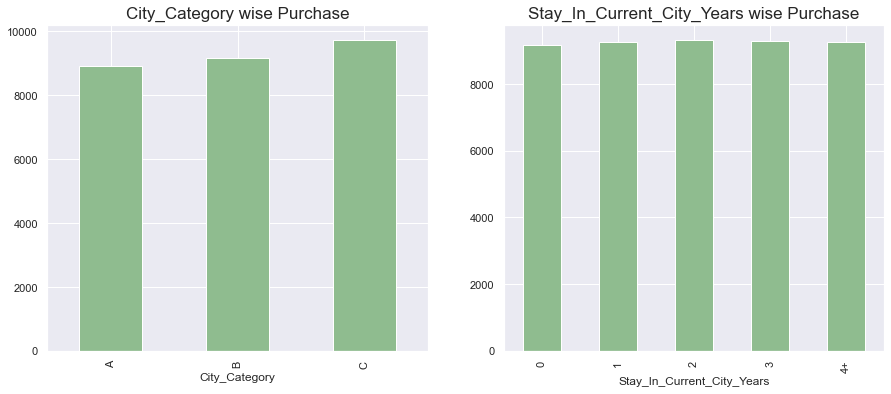

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar',color='darkseagreen')
plt.title("City_Category wise Purchase",fontsize=17)

plt.subplot(1,2,2)
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar',color='darkseagreen')
plt.title("Stay_In_Current_City_Years wise Purchase",fontsize=17)
plt.show()


## Interpretation:
- The city whose buyers spend the most is city type C.
- We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

In [19]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

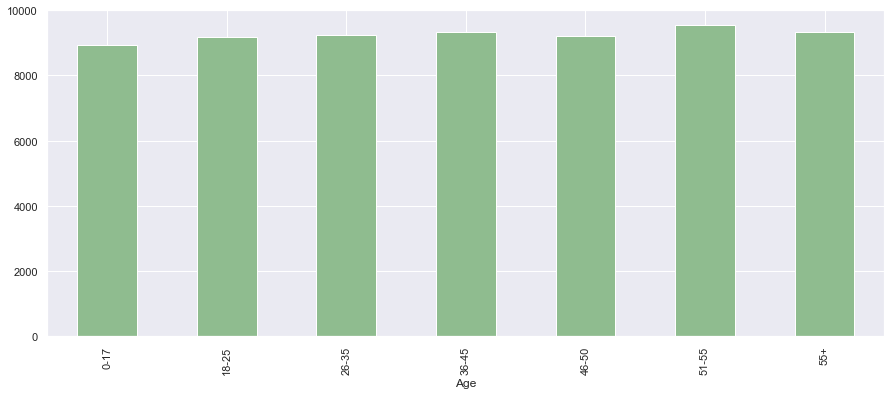

In [20]:
plt.figure(figsize=(15,6))
data.groupby("Age").mean()["Purchase"].plot(kind='bar',color='darkseagreen')
plt.show()

##  Interpretation:
Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

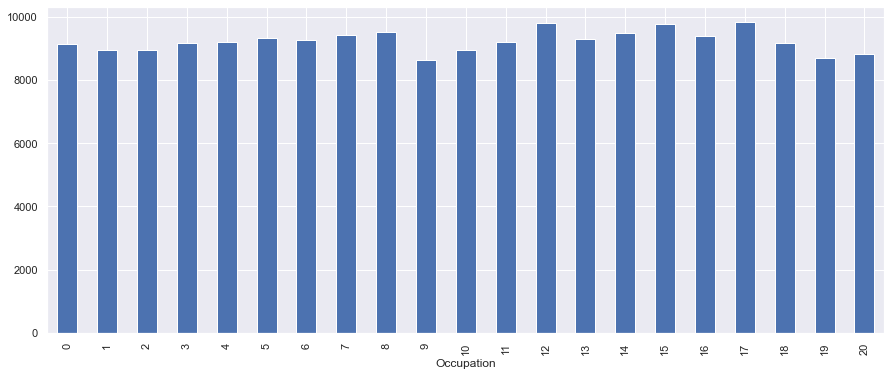

In [21]:
plt.figure(figsize=(15,6))
data.groupby("Occupation").mean()["Purchase"].plot(kind='bar')
plt.show()

## Interpretation:
Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations.

# <font color='grey'><center> III. DATA PREPROCESSING

## Missing value treatment

In [22]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

__We will fill missing values with number 0 do not know which category they belong. Here 0 will representing as the missing category.__

In [24]:
#Filling the missing values 
data['Product_Category_2'] =data['Product_Category_2'].fillna(0).astype('int64')
data['Product_Category_3'] =data['Product_Category_3'].fillna(0).astype('int64')

In [25]:
data.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Feature Engineering 

Feature encoding using label encoder

In [26]:
data.dtypes

Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In [27]:
from sklearn import preprocessing #library for data preprocessing

#list of categorical columns
cat = ['Gender','Age','City_Category','Stay_In_Current_City_Years']

label_encoder = preprocessing.LabelEncoder() #label encoding of categorical columns

for c in cat:
    data[c]= label_encoder.fit_transform(data[c]) #transforming categorical col to numerics

In [28]:
data.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422


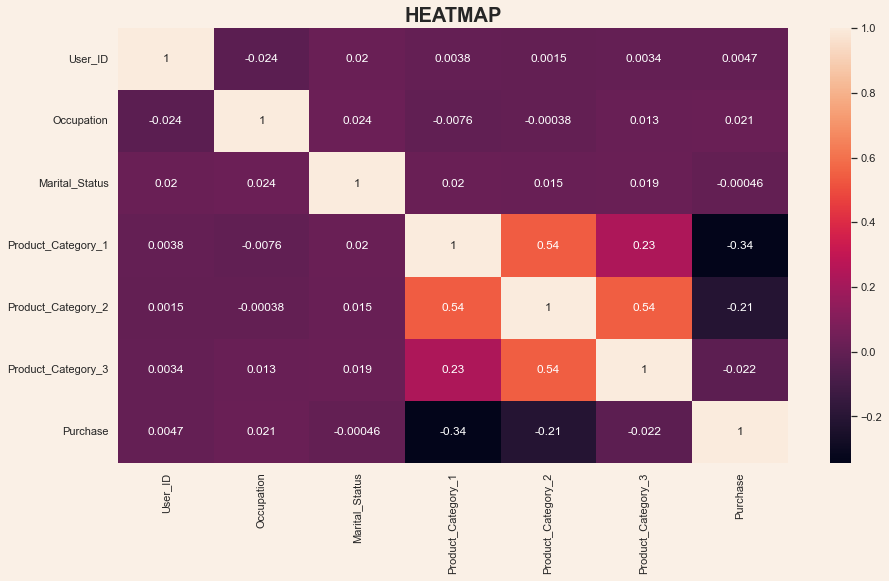

In [29]:
plt.figure(figsize=(15,8), facecolor='linen')
sns.heatmap(df.corr(), annot=True)
plt.title('HEATMAP', fontweight='bold', size=20)
plt.show()

In [30]:
print('\033[1;36mCorrelation of each feature as per target column:\033[0m')
abs(data.corr().Purchase).sort_values(ascending=False)

Correlation of each feature as per target column:


Purchase                      1.000000
Product_Category_1            0.343703
Product_Category_3            0.288501
City_Category                 0.061914
Gender                        0.060346
Product_Category_2            0.052288
Occupation                    0.020833
Age                           0.015839
Stay_In_Current_City_Years    0.005422
Marital_Status                0.000463
Name: Purchase, dtype: float64

# <font color='grey'> Partitioning Target and independent features

In [31]:
X = data.drop('Purchase', axis=1)
y = data['Purchase']

In [32]:
from sklearn.model_selection import train_test_split #for data spliting

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# <font color='grey'> <center> IV. Model Building


### 1.Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression #for linear regression
from sklearn.metrics import mean_squared_error #calculating errors

In [34]:
#model building
lin_model= LinearRegression().fit(X_train, y_train)

In [35]:
#predicting the values
lin_pred= lin_model.predict(X_test)

In [36]:
#Model evaluation

lin_train_score = lin_model.score(X_train, y_train).round(3) #train score
print('Linear model Train score:',lin_train_score)

lin_test_score = lin_model.score(X_test, y_test).round(3) #test score
print('Linear model Test score:',lin_test_score)

lr_RMSE = mean_squared_error(y_test, lin_pred, squared=False) #rmse calulation
print( 'Linear model RMSE:',lr_RMSE)

Linear model Train score: 0.153
Linear model Test score: 0.15
Linear model RMSE: 4646.0320812460495


### 2.Xg Booster


In [37]:
from xgboost.sklearn import XGBRegressor #for XGBRgressor

In [38]:
#model building
xg_model= XGBRegressor().fit(X_train, y_train)

In [39]:
#predicting the values
xg_pred= xg_model.predict(X_test)

In [40]:
#Model evaluation

xg_train_score = xg_model.score(X_train, y_train).round(3) #train score
print('Xg Booster model Train score:',xg_train_score)

xg_test_score = xg_model.score(X_test, y_test).round(3) #test score
print('Xg Booster model Test score:',xg_test_score)

xg_RMSE = mean_squared_error(y_test, xg_pred, squared=False) #rmse calulation
print( 'Xg Booster model RMSE:',xg_RMSE)

Xg Booster model Train score: 0.681
Xg Booster model Test score: 0.673
Xg Booster model RMSE: 2880.380973334491


# <font color='grey'><center> V.Model Comparison

In [45]:
c=['Train score','Test score','RMSE']
i=['Linear regression','XgBoost']
lr=[lin_train_score,lin_test_score,lr_RMSE.round()] 
xg=[xg_train_score,xg_test_score,xg_RMSE.round()]
final=pd.DataFrame([lr,xg],columns=c,index=i)

In [46]:
final

,Train score,Test score,RMSE
Linear regression,0.153,0.150,4646.0
XgBoost,0.681,0.673,2880.0


# <font color='grey'><center> VI. CONCLUSIONS

**From the above indepth analysis, we can conclude the following:**
- XgBoost is the suggested model which can be used as it is fast and its capacity to do parallel computation on a single machine.
- Also from the score comparison we can see that it is not overfitting or under fitting.
- The error rate is also low in XgBoost model.